# Comcast Telecom Complaint Type

### DESCRIPTION

    Comcast is an American global telecommunication company. The firm has been providing terrible 
    customer service. They continue to fall short despite repeated promises to improve. Only last 
    month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 
    consumer complaints.The existing database will serve as a repository of public customer 
    complaints filed against Comcast.It will help to pin down what is wrong with Comcast's 
    customer service.

### Data Dictionary

    - Ticket #: Ticket number assigned to each complaint
    - Customer Complaint: Description of complaint
    - Date: Date of complaint
    - Time: Time of complaint
    - Received Via: Mode of communication of the complaint
    - City: Customer city
    - State: Customer state
    - Zipcode: Customer zip
    - Status: Status of complaint
    - Filing on behalf of someone

### Analysis Task
    To perform these tasks, you can use any of the different Python libraries such as NumPy, 
    SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

        - Import data into Python environment.
        - Provide the trend chart for the number of complaints at monthly and daily granularity 
        levels.
        - Provide a table with the frequency of complaint types.
        - Which complaint types are maximum i.e., around internet, network issues, or across any 
        other domains.
        - Create a new categorical variable with value as Open and Closed. Open & Pending is to 
        be categorized as Open and Closed & Solved is to be categorized as Closed.
        - Provide state wise status of complaints in a stacked bar chart. Use the categorized 
        variable from Q3. 
        - Provide insights on:
            * Which state has the maximum complaints
            * Which state has the highest percentage of unresolved complaints
        - Provide the percentage of complaints resolved till date, which were received through 
        the Internet and customer care calls.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [2]:
#To ignore warnings
warnings.simplefilter('ignore')

### Analysis Task 1
     - Import data into python environment

In [3]:
# Importing Data using pandas
comcast = pd.read_csv("Comcast_telecom_complaints_data.csv")
comcast

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [4]:
# Dataset shape
comcast.shape

(2224, 11)

In [5]:
# Dataset description
comcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [6]:
# Converting column names to lowercase and removing whitespaces for easy access
comcast.columns = comcast.columns.str.lower().str.replace(" ","_")

In [7]:
# Converting date column to datetime object and retrieving month .
comcast['date'] = pd.to_datetime(comcast['date_month_year'])
comcast['month_no'] = comcast['date'].dt.month
comcast['month_name'] = comcast['date'].dt.month

In [8]:
# Converting month no. to month names
month_dict = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
comcast['month_name'] = comcast['month_name'].apply(lambda x: month_dict[x])
comcast.insert(3,'month',comcast['month_name'])
comcast.drop(columns=['month_name'],inplace=True)
comcast

,ticket_#,customer_complaint,date,month,date_month_year,time,received_via,city,state,zip_code,status,filing_on_behalf_of_someone,month_no
0,250635,Comcast Cable Internet Speeds,2015-04-22,Apr,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,2015-08-04,Aug,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,2015-04-18,Apr,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,Jul,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
4,307175,Comcast not working and no service to boot,2015-05-26,May,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-02-04,Feb,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2
2220,318775,Comcast Monthly Billing for Returned Modem,2015-02-06,Feb,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2
2221,331188,complaint about comcast,2015-09-06,Sep,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,9
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,Jun,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6


### Analysis Task 2
        - trend chart for the number of complaints at monthly and daily granularity levels.

In [9]:
# Monthly complaint counts
month_complaints = comcast.groupby('month_no')['customer_complaint'].count()
month_complaints = month_complaints.to_frame()
month_complaints = month_complaints.sort_index()
month_complaints

,customer_complaint
month_no,
1,55
2,59
3,45
4,375
5,317
6,1046
7,49
8,67
9,55


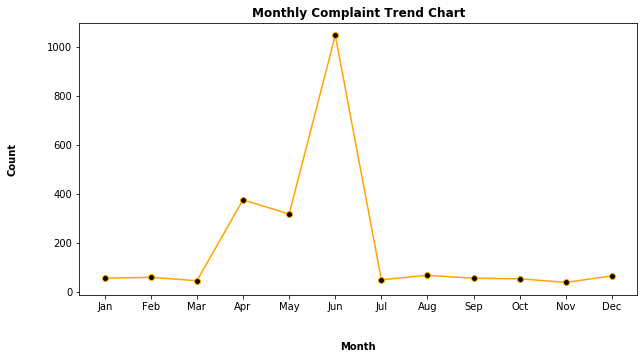

In [10]:
# Trend chart for monthly complaint counts
plt.figure(figsize=(10,5))
plt.plot(month_complaints.index,month_complaints['customer_complaint'],marker='o',color='orange',markerfacecolor = 'black')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
txt = {'weight':'bold'}
plt.title("Monthly Complaint Trend Chart",fontdict=txt)
plt.xlabel('Month',fontdict=txt,labelpad=30)
plt.ylabel('Count',fontdict=txt,labelpad=30)
plt.show()

#### June month has the highest number of complaints from customers

In [11]:
# Daily complaint counts
date_complaints = comcast.groupby('date')['customer_complaint'].count()
date_complaints = date_complaints.to_frame()
date_complaints.head(10)

,customer_complaint
date,
2015-01-04,18
2015-01-05,12
2015-01-06,25
2015-02-04,27
2015-02-05,7
2015-02-06,25
2015-03-04,15
2015-03-05,5
2015-03-06,25


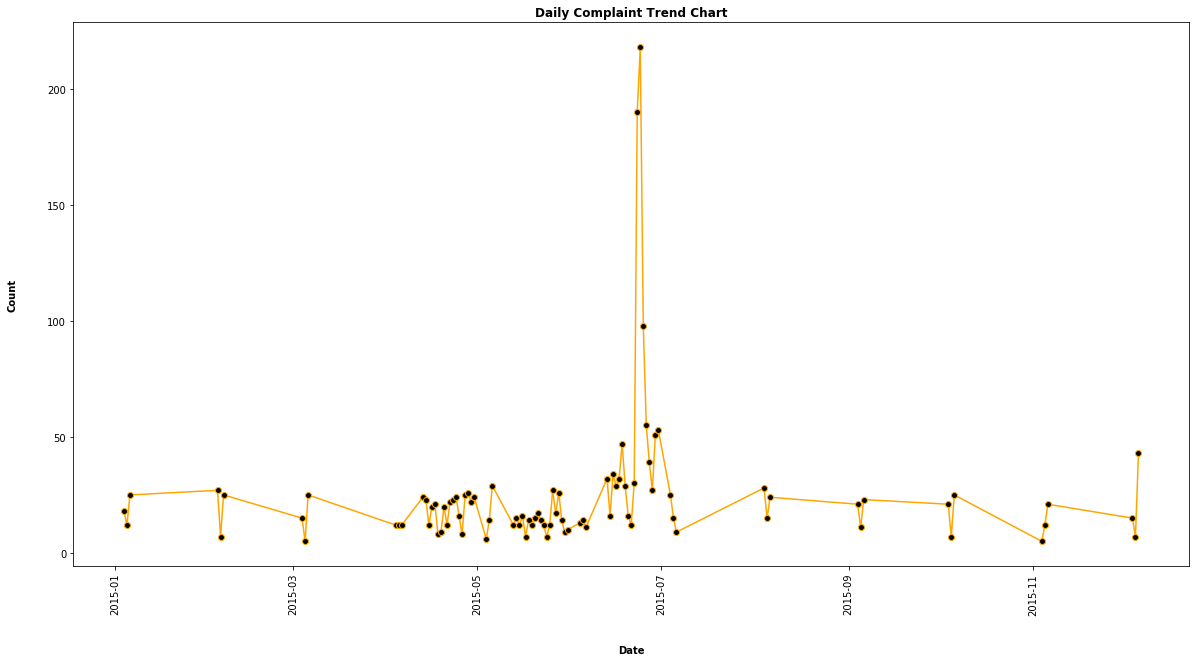

In [12]:
# Trend chart for daily complaint counts
plt.figure(figsize=(20,10))
plt.plot(date_complaints.index,date_complaints['customer_complaint'],marker='o',color='orange',markerfacecolor='black')
plt.xticks(rotation=90)
txt = {'weight':'bold'}
plt.title("Daily Complaint Trend Chart",fontdict=txt)
plt.xlabel('Date',fontdict=txt,labelpad=30)
plt.ylabel('Count',fontdict=txt,labelpad=30)
plt.show()

In [13]:
# Highest number of complaints is on month June
print(date_complaints.loc['2015-06-24'])

customer_complaint    218
Name: 2015-06-24 00:00:00, dtype: int64


#### June 24 th of 2015 has number of highest customer complaints

### Analysis Task 3
     - Provide a table with the frequency of complaint types.

In [14]:
comcast['customer_complaint'] = comcast['customer_complaint'].str.lower()
comcast['complaint_type'] = 0

In [15]:
# Define loop to group complaints based on types
for i in comcast['customer_complaint']:
    if "data cap" in i:
        comcast['complaint_type'][comcast[comcast['customer_complaint']==i].index] = "data cap complaint"
    elif "speed" in i:
        comcast['complaint_type'][comcast[comcast['customer_complaint']==i].index] = "internet speed complaint"
    elif "bill" in i:
        comcast['complaint_type'][comcast[comcast['customer_complaint']==i].index] = "billing complaint"
    elif "internet" in i:
        comcast['complaint_type'][comcast[comcast['customer_complaint']==i].index] = "internet complaint"
    elif "service" in i:
        comcast['complaint_type'][comcast[comcast['customer_complaint']==i].index] = "service complaint"
    elif "comcast" in i:
        comcast['complaint_type'][comcast[comcast['customer_complaint']==i].index] = "comcast complaints"
    else:
        comcast['complaint_type'][comcast[comcast['customer_complaint']==i].index] = i

In [16]:
# Frequency Table for top 15 complaints
top15_complaints = comcast['complaint_type'].value_counts().head(15).to_frame()
top15_complaints['count'] = top15_complaints['complaint_type']
top15_complaints['complaint_type'] = top15_complaints.index
top15_complaints['count'].to_frame()

,count
comcast complaints,558
internet complaint,370
billing complaint,366
service complaint,273
internet speed complaint,191
data cap complaint,150
availabilty,4
unfair pricing,4
throttling,3
monopoly,3


#### Comcast complaints are the highest complaint type registered followed by that is internet complaint.

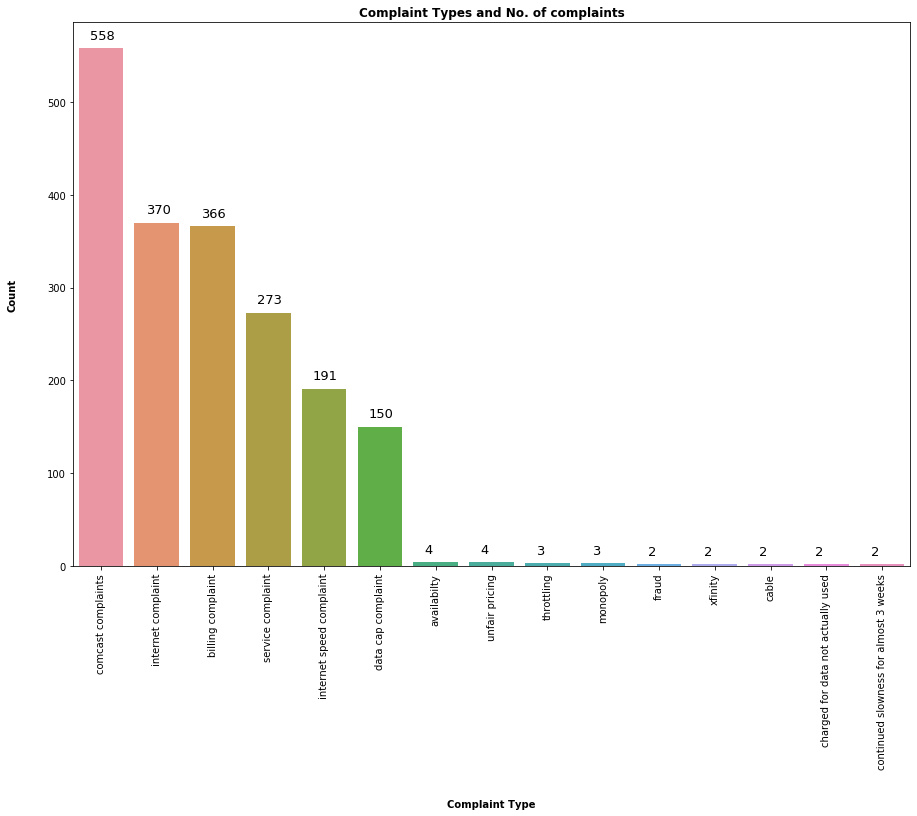

In [17]:
# Barplot for the above frequency Table
plt.figure(figsize=(15,10))
sns.barplot(x='complaint_type',y='count',data=top15_complaints)
plt.xticks(rotation=90)
txt = {'weight':'bold'}
plt.title("Complaint Types and No. of complaints",fontdict=txt)
plt.xlabel('Complaint Type',fontdict=txt,labelpad=30)
plt.ylabel('Count',fontdict=txt,labelpad=30)
for i in range(15):
    plt.annotate(top15_complaints['count'][i],xy=(i-0.2,top15_complaints['count'][i]+10),size=13)
plt.show()

### Analysis Task 4
     - Create a new categorical variable with value as Open and Closed. Open & Pending is to be 
     categorized as Open and Closed & Solved is to be categorized as Closed.

In [18]:
# Create a dummy categorical variable
comcast['open_or_closed']=0

In [19]:
# Define for loop for categorizing the complaint staus
for i in comcast['status']:
    if i in ["Open","Pending"]:
        comcast['open_or_closed'][comcast[comcast['status']==i].index] = "Open"
    else:
        comcast['open_or_closed'][comcast[comcast['status']==i].index] = "Closed"

In [20]:
# Frequency Table
comcast['open_or_closed'].value_counts().to_frame()

,open_or_closed
Closed,1707
Open,517


#### Table shows that most of the complaints registered has been resolved 

### Analysis Task 5
    - Provide state wise status of complaints in a stacked bar chart. Use the categorized 
    variable from Q3. 

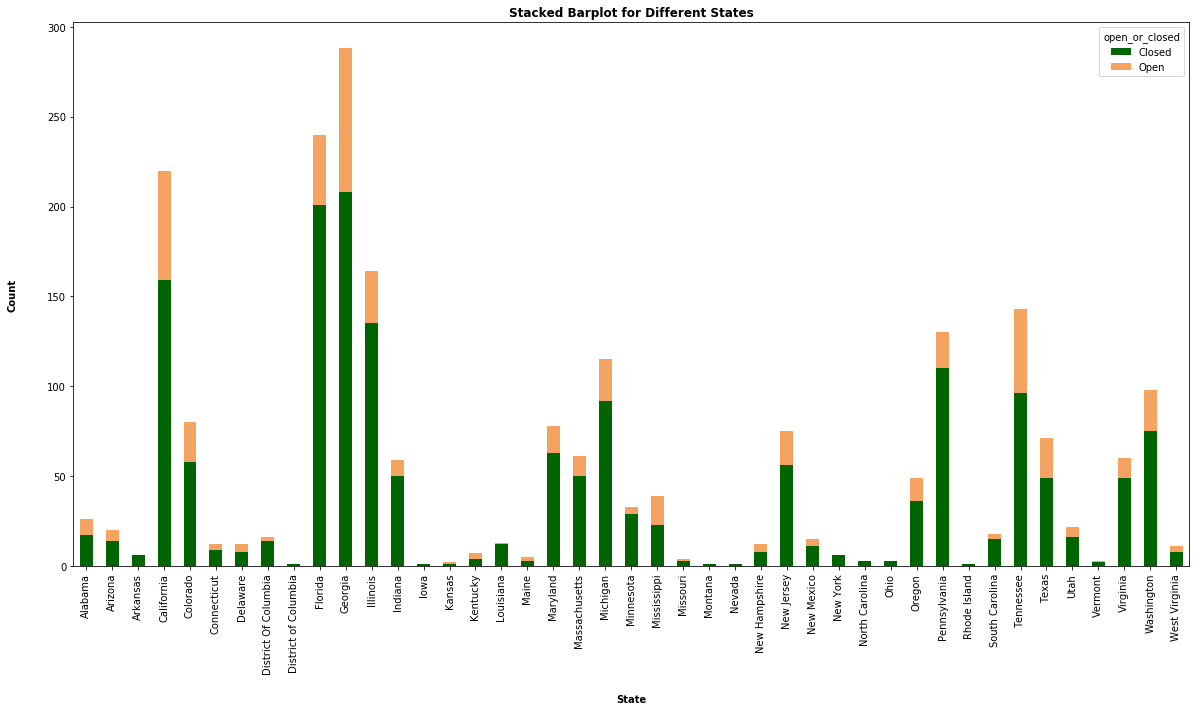

In [21]:
# Stacked Barchart to represent state wise complaint counts and its status
comcast.groupby(['state','open_or_closed']).size().unstack().plot.bar(figsize=(20,10),stacked=True,color=['darkgreen','sandybrown'])
txt = {'weight':'bold'}
plt.title("Stacked Barplot for Different States",fontdict=txt)
plt.xlabel('State',fontdict=txt,labelpad=20)
plt.ylabel('Count',fontdict=txt,labelpad=30)
plt.show()

#### Stacked Barchart shows state wise complaints that has been resolved and unresolved

### Analysis Task 6
    - Provide insights on:
            * Which state has the maximum complaints
            * Which state has the highest percentage of unresolved complaints

In [22]:
# State wise no. of complaints registered
s = comcast['state'].value_counts().to_frame()
s['complaint_count'] = s['state']
s['state'] = s.index
s.head(10)

,state,complaint_count
Georgia,Georgia,288
Florida,Florida,240
California,California,220
Illinois,Illinois,164
Tennessee,Tennessee,143
Pennsylvania,Pennsylvania,130
Michigan,Michigan,115
Washington,Washington,98
Colorado,Colorado,80
Maryland,Maryland,78


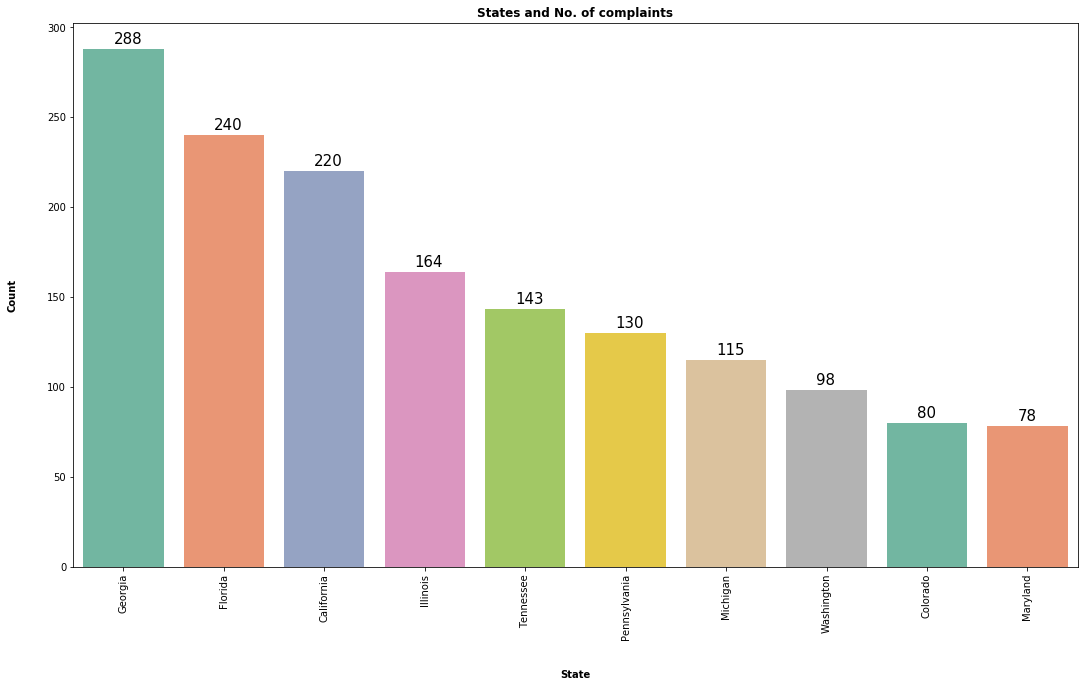

In [23]:
# Barplot for the above frequency table
plt.figure(figsize=(18,10))
sns.barplot(x='state',y='complaint_count',data=s.head(10),palette='Set2')
for i in range(10):
    plt.annotate(s['complaint_count'][i],xy=(i-0.1,s['complaint_count'][i]+3),size=15)
txt = {'weight':'bold'}
plt.title("States and No. of complaints",fontdict=txt)
plt.xlabel('State',fontdict=txt,labelpad=30)
plt.ylabel('Count',fontdict=txt,labelpad=30)
plt.xticks(rotation=90)
plt.show()

#### Georgia has the maximum number of complaints registered 

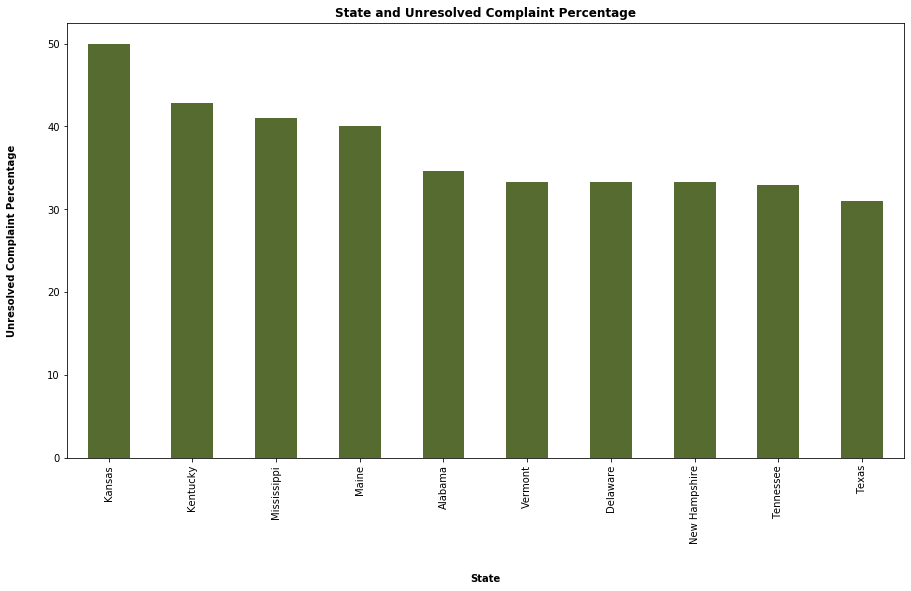

In [24]:
# Bar Plot to represent The states with its Unresolved complaint percentage
high = comcast.groupby(['state','open_or_closed']).size().unstack()
high.fillna(0,inplace=True)
high['unresolved_percent'] = (high['Open']/(high['Open']+high['Closed']))*100
high = high.sort_values('unresolved_percent',ascending=False)
plt.figure(figsize=(15,8))
high['unresolved_percent'].head(10).plot.bar(color='darkolivegreen')
txt = {'weight':'bold'}
plt.title("State and Unresolved Complaint Percentage",fontdict=txt)
plt.xlabel('State',fontdict=txt,labelpad=30)
plt.ylabel('Unresolved Complaint Percentage',fontdict=txt,labelpad=30)
plt.show()

#### Kansas has the highest percentage of unresolved complaints than other states

### Analysis Task 7
    - Provide the percentage of complaints resolved till date, which were received through the 
    Internet and customer care calls.

In [25]:
# Finding the Resolved complaint percentage for various mediums
resolved = comcast.groupby(['received_via','open_or_closed']).size().unstack()
resolved['resolved_percentage'] = (resolved['Closed']/(resolved['Closed']+resolved['Open']))*100
resolved

open_or_closed,Closed,Open,resolved_percentage
received_via,,,
Customer Care Call,864,255,77.211796
Internet,843,262,76.289593


#### 77.2 % of Complaints recieved through Customer care calls were resolved
#### 76.3 % of Complaints recieved through Internet were resolved